# Part II - Impact of Prosper Loan Variables on Customers' Loan Status
## by Josephine Ochai

## Investigation Overview

In this investigation, I wanted to look at the main variables of the Prosper loan records that affected loan status. The major focus was on illustrating the influence of credit score and borrower interest rates on the loan status and on each other. I also illustrated how being a homeowner can affect one's credit score.

## Dataset Overview

The dataset consisted of approximately 114,000 records of Prosper loans with 81 attributes for each loan including -but not limited to- the loan status, loan original amount, borrower APR & interest rate, credit score, employment status of the individuals as well as their income range. For the purpose of my analysis, I wanted to investigate what attributes in the data affect loan status; I suspected the following attributes would have the most impact, so I limited the attributes in the dataset to just 11 variables and excluded all others.

The data contained some missing numerical and categorical values; for every numerical feature that had missing values, its mean value was imputed whereas the missing values found in the categorical features were dropped - 7741 data points in all.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosperloan = pd.read_csv("prosperloan_master.csv")

## Distribution of Loan Status

The distribution of loan status in the dataset shows the majority of borrowers have a positive loan status (current or completed status) compared to borrowers who have defaulted or are past due payment date. A negligible number of borrowers have had their loans either canceled or having final payment in progress.
All variations of 'past due' status with varying delinquency buckets were viewed as just 'past due' for the purpose of this analysis since they were in the minority.

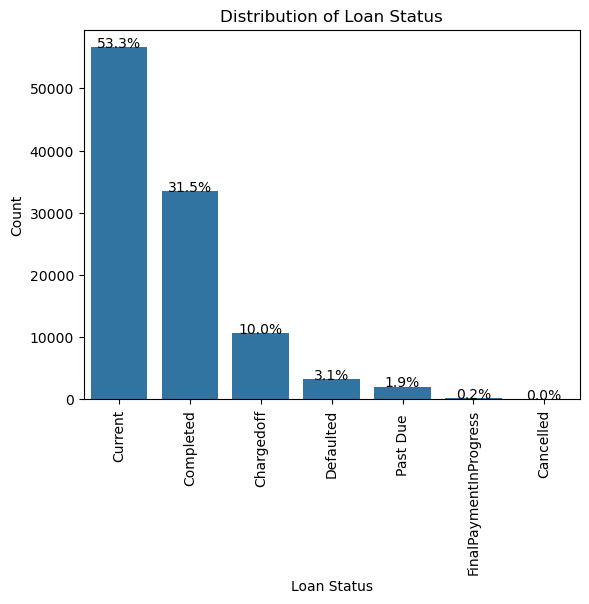

In [3]:
color = sns.color_palette()[0]
loanstatus_count = prosperloan.LoanStatus.value_counts()
order = loanstatus_count.index
sns.countplot(data= prosperloan, x='LoanStatus', color = color, order = order);
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Count")

loan_sum = prosperloan['LoanStatus'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = loanstatus_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan_sum)

    # print the annotation atop the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')

## Distribution of Credit Score

The credit score represents the rating of Prosper's borrowers based on their financial history. The distribution below is indicative of a possibility that Prosper usually requires their borrowers to have a minimum credit score of about 530 in order to be granted loans. Most loans are granted to borrowers with an average score of about 675 - 700.

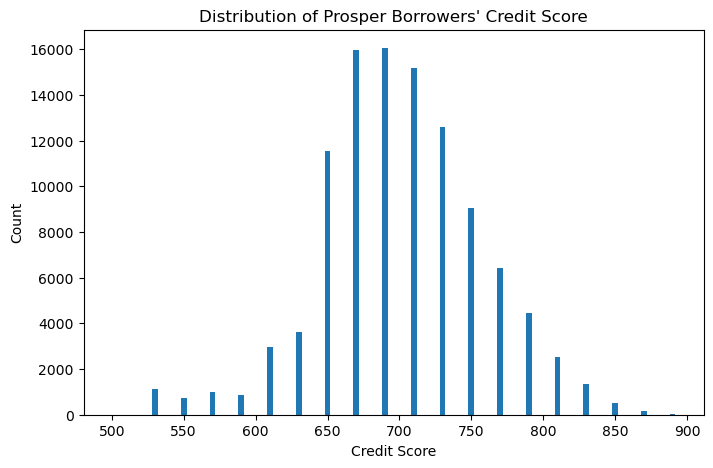

In [4]:
bins = np.arange(500, prosperloan['CreditScoreAvg'].max()+4, 4)
plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan, x = 'CreditScoreAvg', bins = bins)
plt.title("Distribution of Prosper Borrowers' Credit Score")
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()


## Distribution of Borrower Rate
 
The borrower's interest rate has a distribution that takes a unimodal shape with the most occurring interest rate a little above 30%. The distribution also indicates varying spike levels that shows an unsmooth gradation in interest rates.

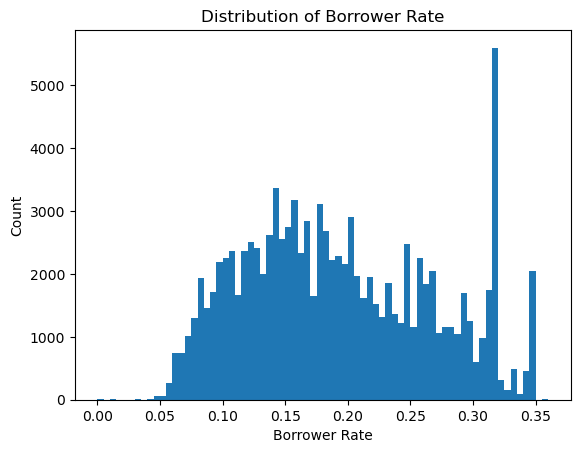

In [5]:
binsize = 0.005
bins = np.arange(0, prosperloan['BorrowerRate'].max()+binsize, binsize)
plt.hist(data = prosperloan, x = 'BorrowerRate', bins = bins)
plt.title("Distribution of Borrower Rate")
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show()


## Credit Score Vs Borrower Rate
The scatterplot below indicates that credit score mostly appears to be negatively correlated with the borrower's interest rate which is logical as Prosper might want to reward/entice those individuals with reputable financial status evident from their high credit scores with low interest rates to encourage loan requests with a reduced financial risk on their end. 
There are however, some few data points with low credit scores and low interest rates as well as points with high credit scores and high interest rates.

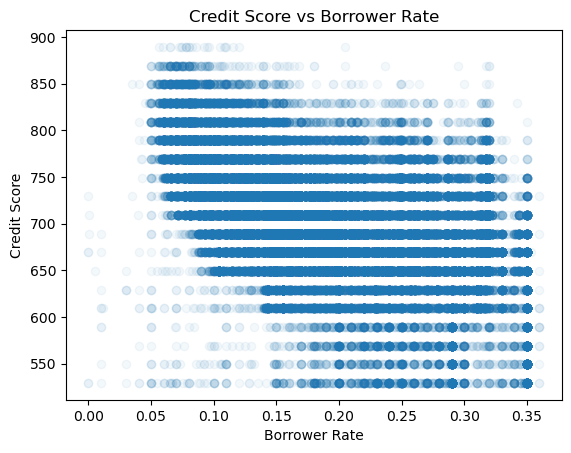

In [6]:
sns.regplot(data = prosperloan, x = 'BorrowerRate', y = 'CreditScoreAvg', truncate=False, scatter_kws={'alpha':1/20}, fit_reg = False);
plt.title('Credit Score vs Borrower Rate')
plt.ylabel('Credit Score')
plt.xlabel('Borrower Rate');

## Credit Score vs Borrower Rate -  Ilustrating the Edge Cases Depicting Positive Correlation
 
Faceting the scatter plot above across the different categorical levels of loan status helps to zoom in on areas where Prosper issued more low interest rate loans to borrowers with low credit scores. These borrowers had loan status of either 'completed', 'defaulted' or 'charged off' as shown in the scatter plots below.

In [7]:
prosperloan_completed = prosperloan[prosperloan.LoanStatus == 'Completed']
prosperloan_defaulted = prosperloan[prosperloan.LoanStatus == 'Defaulted']
prosperloan_chargedoff = prosperloan[prosperloan.LoanStatus == 'Chargedoff']

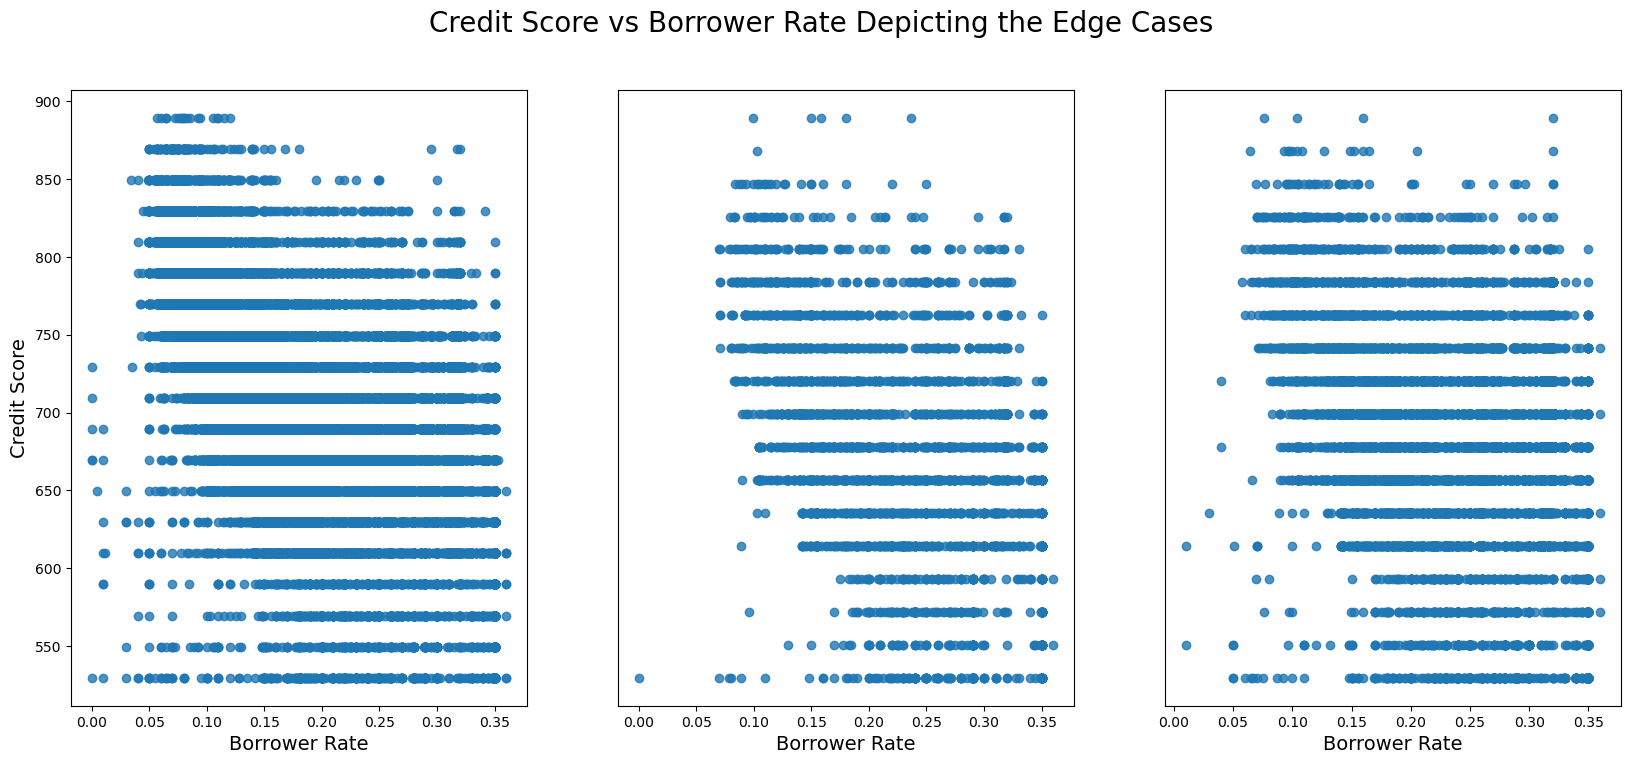

In [8]:
fig, ax = plt.subplots(ncols=3, figsize = [20,8])

base_color = sns.color_palette()[0]
sns.regplot(data = prosperloan_completed, x = 'BorrowerRate', y = 'CreditScoreAvg', truncate=False, fit_reg = False, ax = ax[0])
ax[0].set_ylabel("Credit Score", fontsize = 14)
ax[0].set_xlabel("Borrower Rate", fontsize = 14)
sns.regplot(data = prosperloan_defaulted, x = 'BorrowerRate', y = 'CreditScoreAvg', truncate=False, fit_reg = False, ax = ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("Borrower Rate", fontsize = 14)
ax[1].tick_params(labelleft=False, left=False)
sns.regplot(data = prosperloan_chargedoff, x = 'BorrowerRate', y = 'CreditScoreAvg', truncate=False, fit_reg = False, ax = ax[2])
ax[2].set_ylabel("")
ax[2].set_xlabel("Borrower Rate", fontsize = 14)
ax[2].tick_params(labelleft=False, left=False)
plt.suptitle("Credit Score vs Borrower Rate Depicting the Edge Cases", fontsize = 20)
plt.show()

## Loan Status by Credit Score and Borrower Rate
 
The violin plots below show that there are more lower borrower rate values with corresponding high credit score values for loan records with either a 'completed' or 'current' loan status. Conversely, loans that have been defaulted, charged off or past due agreed payment timelines have lower credit scores and higher values for interest rates.

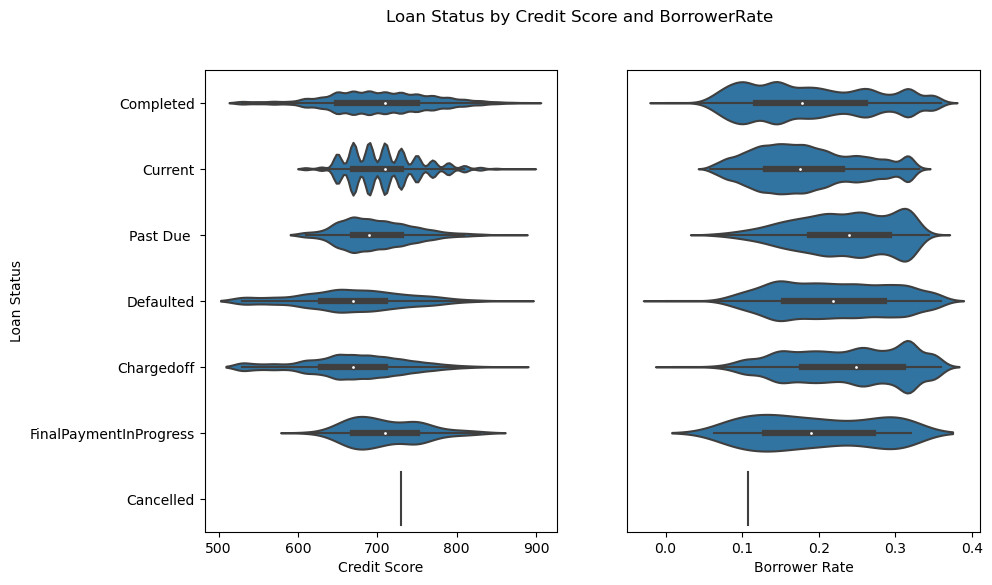

In [9]:
def violin_plot(y,x1,x2):
    fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
    base_color = sns.color_palette()[0]
    
    plt.subplot(1, 2, 1)
    sns.violinplot(data=prosperloan, x=x1, y=y, color=base_color, inner= 'box')
    ax[0].set_ylabel("Loan Status")
    ax[0].set_xlabel("Credit Score")

    plt.subplot(1, 2, 2)
    sns.violinplot(data=prosperloan, x=x2, y=y, color=base_color, inner= 'box')
    ax[1].set_ylabel("")
    ax[1].set_xlabel("Borrower Rate")
    plt.tick_params(labelleft=False, left=False)
violin_plot(y='LoanStatus',x2='BorrowerRate',x1='CreditScoreAvg')
plt.suptitle("Loan Status by Credit Score and BorrowerRate")
plt.show()

## Impact of Owning a Home on Credit Score
 
The line plot shows that there appears to be a reasonable increase in the credit scores of homeowners across all categorical levels of loan status more than those who do not have homes indicating that owning properties generally tends 
to improve one's credit score to a significant level. 

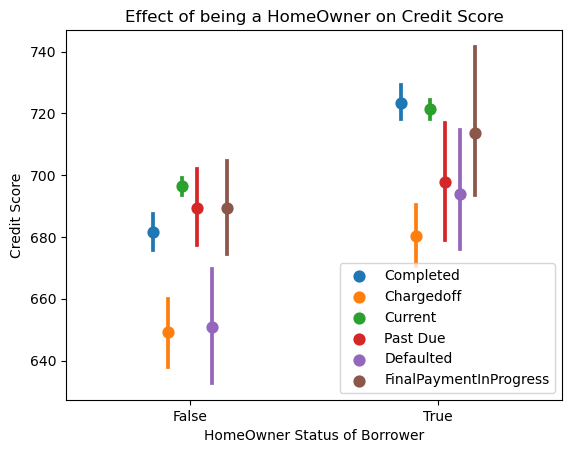

In [13]:
prosperloan_samp = prosperloan.sample(n=3000, replace = False)
ax = sns.pointplot(data = prosperloan_samp, x = 'IsBorrowerHomeowner', y = 'CreditScoreAvg', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 4, ncol = 1)
plt.title("Effect of being a HomeOwner on Credit Score")
plt.ylabel('Credit Score')
plt.xlabel('HomeOwner Status of Borrower');

In [1]:
!jupyter nbconvert Part_II_Prosper_Loan_Data_Explanotory_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_Data_Explanotory_Analysis.ipynb to slides
[NbConvertApp] Writing 1213310 bytes to Part_II_Prosper_Loan_Data_Explanotory_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\josep\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\josep\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\josep\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\josep\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\josep\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_s